<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_3b_OLCI_SNAP_batch_processing_C2RCC.ipynb" target="_blank"><< OLCI SNAP processing: IdePiX and C2RCC</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Juan Ignacio-Gossn (EUMETSAT)

<html>
    <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=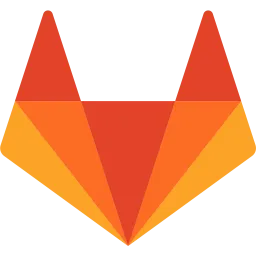" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?term=learn%20olci&sort=score%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-3%7COLCI%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=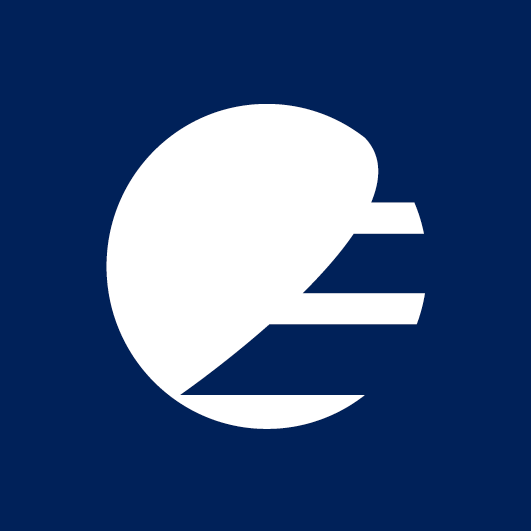" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-olci/HEAD?urlpath=%2Ftree%2F2_OLCI_advanced%2F2_4_OLCI_matchup_validation.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-olci/2_OLCI_advanced/2_4_OLCI_matchup_validation.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Advanced</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to enable you to download products from the EUMETSAT Data Store.

There are no prerequisite notebooks for this module.
</div>
<hr>

# 2.4 OLCI validation with the ThoMaS match-up toolkit

### Data used

| Dataset | EUMETSAT Data Store<br>collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level-2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> |
| Sentinel-3 OLCI level-1B full resolution | EO:EUM:DAT:0409 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> |
| Sentinel-3 OLCI level-2 full resolution BC003 reprocessing | EO:EUM:DAT:0556 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0556" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:0556 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3A0556" target="_blank">Description</a> |
| Sentinel-3 OLCI level-1B full resolution BC002 reprocessing | EO:EUM:DAT:0577 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0577" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:0577 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3A0577" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* how to use the ThoMaS toolkit to perform OLCI match-up validation extractions and analyses

### Outline

Validation studies are essential to ensuring satellite sensor performance and a necessary part of algorithm development. For ocean colour studies, match-up analyses are a key part of validation. The ThoMaS (Tool to generate Matchups of OC products with Sentinel-3/OLCI) package provides a comprehensive set of tools to help with the validation of OLCI products, supporting many common workfows including;
* satellite data acquisition
* mini file extraction
* *in situ* data management
* BRDF correction

ThoMaS is written in Python and is made available through a **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS" target="_blank">EUMETSAT Gitlab repository</a>**. The package can be used from the command line, or imported as a Python library, as done here. This notebook contains 3 examples of how to use ThoMaS in various ways, but the capability shown is not exhaustive. Many more command-line examples are included in the repository, and we encourage users to familiarise themselves with both the **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS/-/blob/main/README.md" target="_blank">project README</a>** and **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS/-/blob/main/README_examples.md" target="_blank"> example README</a>** for more information.

The examples given here should give you some insight into what ThoMaS can do, but we encourage you to build on these to facilitate your own validation workflows.

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>

0. [Defining functions](#section0)
1. [Getting the ThoMaS toolkit](#section1)
1. [Configuring ThoMaS](#section2)
1. [Example 1: Single location extraction at WCO L4](#section3)
1. [Example 2: Full match-up exercise at the Venice AERONET-OC station](#section4)
1. [Example 3: Full match-up exercise with in situ hyperspectral R$_{rs}$](#section5)
2. [What next?](#section6)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python environment (`cmts_learn_olci`) using the file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import os
import sys
import pandas as pd
import shutil
import numpy as np

<div class="alert alert-warning" role="alert">

## <a id='section0'></a>Defining functions
[Back to top](#TOC-TOP)

</div>

Before we go any further we are going to define a quick function that helps us to write our configuration options to a file.

*Note: We don't need to write our configurations in python, we could always just write the configuration file directly and point ThoMaS to it*

In [2]:
# Write config_params sections into config_file.ini
def write_config_file(path_to_config_file,config_params):
    with open(path_to_config_file, 'w') as text_file:
        for section,section_params in config_params.items():
            text_file.write('\n[%s]\n' % (section))
            for param, value in section_params.items():
                text_file.write('%s: %s\n' % (param, value))

<div class="alert alert-info" role="alert">

## <a id='section1'></a>Getting the ThoMaS toolkit
[Back to top](#TOC-TOP)

</div>

The first thing we need to do is retrieve the tool kit itself. We can do this using the external `! git clone` command. This will create a directory called **ThoMaS** in this path and make the code available for import.

In [3]:
if os.path.exists(os.path.join("ThoMaS", "main.py")):
    print("ThoMaS is already installed.")
else:
    ! git clone https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS.git

ThoMaS is already installed.


<div class="alert alert-info" role="alert">

## <a id='section2'></a>Configuring and loading ThoMaS
[Back to top](#TOC-TOP)

</div>

Before you use ThoMas, you must ensure that you have have completed the following two steps:
1. Ensure that you have all the Python dependencies you need to run ThoMaS. If you have installed and activated the **cmts_learn_olci** environment then you are all set.
1. Ensure that ThoMaS can access the EUMETSAT Data Store, which you can do by completing the "**EUMDAC**" section of the <a href="../working-with-python/API_authentication.ipynb" target="_blank"> set credentials notebook</a>.

ThoMaS can be used from the <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-science-studies/ThoMaS/-/blob/main/README_examples.md" target="_blank">command line</a>, but here we will use it as a Python library. Lets import ThoMaS into our notebook.

In [4]:
sys.path.append("ThoMaS")
from main import ThoMaS_main as ThoMaS

Now we should have ThoMaS imported and configured for use, so we can proceed with our examples.

<div class="alert alert-info" role="alert">

## <a id='section3'></a>Example 1: Single location extraction at WCO L4
[Back to top](#TOC-TOP)

</div>

<div class="alert alert-success" role="alert">

Run ThoMaS for:

1. Single location
1. Single time window
1. Only satellite download, minifiles creation and extractions (EDB)

</div>

#### Description
<hr>
In this case we are going to look at extracting data over a single time window over a static mooring. We are only going to acquire the Sentinel-3 OLCI data and process it to minifiles and then perform extraction using the EUMETSAT standard protocol. We are not going to compare the results with *in situ* data. Below are our requirements for this workflow:

1. I want to download Sentinel-3 OLCI data overpassing the point location of the <a href="https://www.westernchannelobservatory.org.uk/buoys.php" target="_blank">**Western Channel Observatory L4 station**</a> (50.15 N, -4.13 W), considering the first 10 days of June 2023.
1. I want data from Sentinel-3A only
1. I only want full resolution level-2 data from the most recent collection OL__L2M.003 (Colection 3)
1. I just want to obtain the S3 files (SatData), minifiles and extractions, I have my own scripts to compute the statistics of the comparison with insitu.
1. In particular, I want to test EUMETSAT's standard extraction protocol, and I want to test window size 3x3.
1. I want everything related to the run to be stored at in the "WCO_L4" directory.

<hr>

Lets start by defining an output path for our analysis. Everything we do will be stored in this directory.

In [ ]:
output_path = os.path.join(os.getcwd(), "WCO_L4")
if not os.path.exists(output_path):
    os.mkdir(output_path)

Now we are going to define a configuration file that sets the parameters for our analysis. We will create this as a dictionary.

In [ ]:
# Build your config_file.ini
path_to_config_file = os.path.join(output_path, 'config_file.ini')
config_params = {}

The first section of our configuration are our global settings. A key to this is the definition of our "global workflow". This defines the processing steps that we want to perform on our data. In this case, we specify that we want to download satellite data (SatData), we want to generate minifiles (minifiles) and we want to create our extraction data base (EDB). Each of these steps requires another configuration file section, which we will come to later.

In [ ]:
# global
config_params['global'] = {}
config_params['global']['path_output'] = output_path
config_params['global']['SetID'] = 'Western_channel_observatory_L4'

# workflow
config_params['workflow'] = {}
config_params['workflow']['workflow'] = 'SatData, minifiles, EDB'

Now we will define the parameters for each of our workflow sections, stating with our satellite data. Here we will entire all the relevant parameters that will determine the data we will use.

In [ ]:
# satellite
config_params['satellite'] = {}
config_params['satellite']['satellite_path-to-SatData'] = os.path.join(output_path, 'SatData')
config_params['satellite']['satellite_source'] = 'EUMETSATdataStore'
config_params['satellite']['satellite_collections'] = 'operational'
config_params['satellite']['satellite_platforms'] = 'S3A'
config_params['satellite']['satellite_resolutions'] = 'FR'

Next, lets define our minifile extraction window.

In [ ]:
# minifiles
config_params['minifiles'] = {}
config_params['minifiles']['minifiles_winSize'] = 3

Lastly, we will define the specifics of our extraction protocol for selecting data.

In [ ]:
# EDB
config_params['EDB'] = {}
config_params['EDB']['EDB_protocols_L2'] = 'EUMETSAT_standard_L2'
config_params['EDB']['EDB_winSizes'] = 3

Now we have everything defined, we will write our parameters to our config file.

In [ ]:
write_config_file(path_to_config_file, config_params)

The last thing we need to do is define the specifics of our extraction site; e.g. location and time window. We do this in a second file, as below.

In [ ]:
# Define the path
path_to_latLonTimeRanges = os.path.join(output_path, 'latLonTimeRanges.csv')

# Define the necessary inputs
latLonTime = pd.DataFrame(columns = ['StationID', 'Lat', 'Lon', 'time_start', 'time_stop'])
latLonTime.loc[0, 'StationID'] = 'Western_channel_observatory_L4'
latLonTime.loc[0, 'Lat'] = 50.15
latLonTime.loc[0, 'Lon'] = -4.13
latLonTime.loc[0, 'time_start'] = '2023-05-26T00:00:00'
latLonTime.loc[0, 'time_stop'] = '2023-06-06T00:00:00'

# Store as csv file
latLonTime.to_csv(path_to_latLonTimeRanges, index=False)

Now everything is defined we can run ThoMaS. The only thing we need to do is pass the tool kit the path to our configuration file.

In [ ]:
# Run ThoMaS and check all the outputs in the output directory
ThoMaS(path_to_config_file)

If all went well, in our experiment directory you should now have several folders that contain the outputs from the ThoMaS analysis.
* SatData contains the full downloaded products
* SatDataLists contains information on the inventory of downloaded data
* minifiles contains the extracted minifiles
* minifilesLists contains information on the inventory of downloaded data
* EDB, the most important folder, contains the results of the extractions we made from the minifiles.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>Example 2: Full match-up exercise at the Venice AERONET-OC station
[Back to top](#TOC-TOP)

</div>

<div class="alert alert-success" role="alert">

Run ThoMaS for:

1. download AERONET-OC *in situ* data for the Venice station and convert to SeaBASS/OCDB format
1. full matchup exercise: satellite extractions + minifiles + extraction statistics + matchup statistics
1. apply a BRDF correction
1. use EUMETSAT standard protocol for extractions and for insitu-extraction comparison.

</div>

#### Description
<hr>

In this case we are going to look at extracting data over a single **<a href="https://aeronet.gsfc.nasa.gov/new_web/photo_db_v3/Venise.html" target="_blank">AERONET-OC</a>** site, as stored in a remote database. The time windows will be determined by the measurements in the database itself, we will just set time bounds for the extraction. We are going to acquire the Sentinel-3 OLCI data and perform the full comparison against the AERONET data. Below are our requirements for this workflow:

1. I want to test the performance of OLCI at the AERONET-OC station Venice, during February 2021.
1. I wish to get matchups between this Venice subset and S3A/OLCI standard FR L2,
    1. From the current collection OL__L2M.003
    1. using the standard extraction protocol from EUMETSAT,
    1. an extraction window of 5x5,
    1. using an insitu-satellite time difference threshold of 1 hour (3600 seconds).
1. I am not interested in getting ancillary data from ECMWF for to the insitu data.
1. I want to apply the Morel et al. 2002 BRDF correction to both satellite and insitu.
1. If I have several insitu measurements corresponding to one single SatData within the time window that you selected, but you wish to keep only the closest in time with ./Venice/SatData
1. All the other outputs (IDB, minifiles, EDB, MDB, etc.) to be stored in the "Venice" directory.

<hr>

We are going to perform exactly the same steps as we did in example 1, beginning with defining our output path.

In [5]:
# Define and create the path to your main output directory for this exercise.
output_path = os.path.join(os.getcwd(), "Venice")
if not os.path.exists(output_path):
    os.mkdir(output_path)

And as before we will define a configuration file. However, there are some differences to before. We need to define how we work with *in situ* data, specifically for AERONET-OC, and define how we handle the in situ data in our match up database (MDB).

*Note: The AERONET-OC site is called Veni**s**e and not Veni**c**e!*

In [6]:
# Build your config_file.ini
path_to_config_file = os.path.join(output_path, 'config_file.ini')
config_params = {}

# global
config_params['global'] = {}
config_params['global']['path_output'] = output_path
config_params['global']['SetID'] = 'Venice'
config_params['global']['workflow'] = 'insitu, SatData, minifiles, EDB, MDB'

# AERONETOC
config_params['AERONETOC'] = {}
config_params['AERONETOC']['AERONETOC_pathRaw'] = os.path.join(output_path, 'Venice', 'AERONET_OC_raw')
config_params['AERONETOC']['AERONETOC_dateStart'] = '2021-05-01T00:00:00'
config_params['AERONETOC']['AERONETOC_dateEnd'] = '2021-06-01T00:00:00'
config_params['AERONETOC']['AERONETOC_dataQuality'] = 2
config_params['AERONETOC']['AERONETOC_station'] = 'Venise'

# insitu
config_params['insitu'] = {}
config_params['insitu']['insitu_data2OCDBfile'] = 'AERONETOC'
config_params['insitu']['insitu_input'] = os.path.join(output_path, 'Venice_OCDB.csv')
config_params['insitu']['insitu_satelliteTimeToleranceSeconds'] = 3600
config_params['insitu']['insitu_getAncillary'] = False 
config_params['insitu']['insitu_BRDF'] = 'M02'

# satellite
config_params['satellite'] = {}
config_params['satellite']['satellite_path-to-SatData'] = os.path.join(output_path, 'SatData')
config_params['satellite']['satellite_source'] = 'EUMETSATdataStore'
config_params['satellite']['satellite_collections'] = 'operational'
config_params['satellite']['satellite_platforms'] = 'S3A'
config_params['satellite']['satellite_resolutions'] = 'FR'
config_params['satellite']['satellite_BRDF'] = 'M02'

# minifiles
config_params['minifiles'] = {}
config_params['minifiles']['minifiles_winSize'] = 5

# EDB
config_params['EDB'] = {}
config_params['EDB']['EDB_protocols_L2'] = 'EUMETSAT_standard_L2'
config_params['EDB']['EDB_winSizes'] = 5

# MDB
config_params['MDB'] = {}
config_params['MDB']['MDB_time-interpolation'] = 'insitu2satellite_NN'
config_params['MDB']['MDB_stats_plots'] = True
config_params['MDB']['MDB_stats_protocol'] = 'EUMETSAT_standard_L2'

# Write config_params sections into config_file.ini
write_config_file(path_to_config_file, config_params)

Lets run this configuration and then check our outputs.

In [7]:
# Run ThoMaS and check all the outputs in the output directory
ThoMaS(path_to_config_file)


Running Venice

Building satellite_datasets file from specified options in config_file...

Step insitu
Creating IDB (in situ database) netcdf file and calculating timeRanges and satellite datasets from input SeaBASS/OCDB file (in situ)
creating IDB: Venice
Sanitised file successfully saved: /Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-olci/2_OLCI_advanced/Venice/Venice_OCDB_sanitised.csv
Spectral matching not supported for multispectral sza, skipping...
Spectral matching not supported for multispectral saa, skipping...
Spectral matching not supported for multispectral Lt, skipping...
Spectral matching not supported for multispectral Lsky, skipping...
Spectral matching not supported for multispectral Rho, skipping...
Spectral matching not supported for multispectral aot, skipping...
Spectral matching not supported for multispectral o3ot, skipping...
Spectral matching not supported for multispectral rot, skipping...
Spectral matching not supported for multispectral no2ot,

In this case, we have run a full analysis, so along side all of our data we have some summary plots.

<div class="alert alert-info" role="alert">

## <a id='section5'></a>Example 3: Full match-up exercise with *in situ* hyperspectral R$_{rs}$
[Back to top](#TOC-TOP)

</div>

<div class="alert alert-success" role="alert">

Run ThoMaS for:

1. full matchup exercise: satellite extractions + minifiles + extraction statistics + matchup statistics
1. insitu data already available in SeaBASS/OCDB format
1. apply a BRDF correction
1. use EUMETSAT standard protocol for extractions and for insitu-extraction comparison.

</div>

#### Description

<hr>

In this final example we are going to perform a full analysis using a subset of data from the MOBY ocean colour database as our *in situ* data.

1. You have a prepared a set of hyperspectral Rrs insitu measurements from MOBY in SeaBASS format not corrected for BRDF effects.
1. You wish to get matchups between this MOBY subset and;
    1. S3A/OLCI standard FR L2,
    1. From the current collection OL__L2M.003
    1. using the standard extraction protocol from EUMETSAT,
    1. an extraction window of 5x5,
    1. an insitu-satellite time difference threshold of 1 hour (3600 seconds).
1. You are not interested in getting ancillary data from ECMWF for to the insitu data.
1. You want to apply the <a href="https://opg.optica.org/ao/abstract.cfm?uri=AO-41-30-6289" target="_blank">Morel et al., 2002</a> BRDF correction to both satellite and insitu.
1. You may have several insitu measurements corresponding to one single SatData within the time window that you selected, but you wish to keep only the closest in time with the satellite overpass.
1. You wish: SatData to be stored at ./MOBY/SatData
1. all the other outputs (IDB, minifiles, EDB, MDB, etc.) to be stored in the "MOBY" directory.

<hr>

We are going to perform similar steps to those in example 1, beginning with defining our output path.

In [8]:
# Define and create your main output path for this example:
output_path = os.path.join(os.getcwd(), "MOBY")
if not os.path.exists(output_path):
    os.mkdir(output_path)

Lets now copy some SEABASS/OCDB format *in situ* data into this experiment path (this is included in command line example 6).

In [9]:
# Copy the MOBY sample data (/ThoMaS/examples/examples6/MOBY_OCDB.csv) to your target output directory
path_insitu = os.path.join(output_path, 'MOBY_OCDB.csv')
shutil.copy(os.path.join(os.getcwd(), 'ThoMaS', 'examples', 'example6', 'MOBY', 'MOBY_OCDB.csv'), path_insitu)

'/Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-olci/2_OLCI_advanced/MOBY/MOBY_OCDB.csv'

Lets take a quick look at a subset of the data....

In [10]:
with open(path_insitu) as file:
    print('\t'.join(["Station", "\t\tDate", "\tTime", "\tStatus"]))
    for line in file:
        if not any(ext in line[0] for ext in ['/', '!']):
            print('\t'.join(line.rstrip().split(',')[0:4]))

Station			Date		Time		Status
M260_2016061020d	20160610	21:14:37	Good
M260_2016071120d	20160711	21:14:32	Good
M260_2016071920d	20160719	21:15:05	Questionable
M260_2016072220d	20160722	21:14:37	Questionable
M260_2016080320d	20160803	21:14:32	Good
M261_2016082620d	20160826	21:13:24	Good
M261_2016093020d	20160930	21:13:54	Good
M261_2016100820d	20161008	21:13:27	Good
M261_2016101920d	20161019	21:15:10	Good
M261_2017010420d	20170104	21:06:21	Good
M261_2017010520d	20170105	21:06:28	Good
M261_2017011120d	20170111	21:05:57	Good
M261_2017011220d	20170112	21:06:00	Good
M262_2017022320d	20170223	21:15:58	Questionable
M262_2017031520d	20170315	21:15:54	Questionable
M262_2017032620d	20170326	21:15:56	Good
M262_2017040320d	20170403	21:14:46	Good
M262_2017052320d	20170523	21:17:10	Good
M262_2017052720d	20170527	21:16:57	Good
M262_2017060420d	20170604	21:17:47	Good
M262_2017061920d	20170619	21:16:51	Questionable
M263_2017080420d	20170804	21:14:21	Good
M263_2017082020d	20170820	21:12:26	Questionable
M26

And, as in example 2, we will vuild our configuration file...

In [11]:
# Build your config_file.ini
path_to_config_file = os.path.join(output_path, 'config_file.ini')
config_params = {}

# global
config_params['global'] = {}
config_params['global']['path_output'] = output_path
config_params['global']['SetID'] = 'MOBY'
config_params['global']['workflow'] = 'insitu, SatData, minifiles, EDB, MDB'

# insitu
config_params['insitu'] = {}
config_params['insitu']['insitu_input'] = os.path.join(output_path, 'MOBY_OCDB.csv')
config_params['insitu']['insitu_satelliteTimeToleranceSeconds'] = 3600
config_params['insitu']['insitu_getAncillary'] = False 
config_params['insitu']['insitu_BRDF'] = 'M02'

# satellite
config_params['satellite'] = {}
config_params['satellite']['satellite_path-to-SatData'] = os.path.join(output_path, 'SatData')
config_params['satellite']['satellite_source'] = 'EUMETSATdataStore'
config_params['satellite']['satellite_collections'] = 'operational'
config_params['satellite']['satellite_platforms'] = 'S3A'
config_params['satellite']['satellite_resolutions'] = 'FR'

# minifiles
config_params['minifiles'] = {}
config_params['minifiles']['minifiles_winSize'] = 5

# EDB
config_params['EDB'] = {}
config_params['EDB']['EDB_protocols_L2'] = 'EUMETSAT_standard_L2'
config_params['EDB']['EDB_winSizes'] = 5

# MDB
config_params['MDB'] = {}
config_params['MDB']['MDB_time-interpolation'] = 'insitu2satellite_NN'
config_params['MDB']['MDB_stats_plots'] = True
config_params['MDB']['MDB_stats_protocol'] = 'EUMETSAT_standard_L2'

# Write config_params sections into config_file.ini
write_config_file(path_to_config_file, config_params)

...and run!

In [13]:
# Run ThoMaS and check all the outputs in the output directory
ThoMaS(path_to_config_file)


Running MOBY

Building satellite_datasets file from specified options in config_file...

Step insitu
Creating IDB (in situ database) netcdf file and calculating timeRanges and satellite datasets from input SeaBASS/OCDB file (in situ)
Already exists!: /Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-olci/2_OLCI_advanced/MOBY/IDB/IDB_MOBY.nc

Step SatData
Already exists!: /Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-olci/2_OLCI_advanced/MOBY/SatData
Already exists!: /Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-olci/2_OLCI_advanced/MOBY/SatData/S3A_OL_2_WFR____20160610T202635_20160610T202835_20210706T132838_0119_005_128______MAR_R_NT_003.SEN3
Already exists!: /Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-olci/2_OLCI_advanced/MOBY/SatData/S3A_OL_2_WFR____20160711T202303_20160711T202503_20210707T002908_0119_006_185______MAR_R_NT_003.SEN3
Already exists!: /Users/benloveday/Code/Git_Reps/CMTS/internal/sensors/learn-olci/2_OLCI_advanced/M

<div class="alert alert-info" role="alert">

## <a id='section6'></a>What next?
[Back to top](#TOC-TOP)

</div>

You can find many more example of configuration files in the ./ThoMaS/examples directory. Building on these, and the examples shown above you should be able to build a validation workflow that works for your circumstances!

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_3b_OLCI_SNAP_batch_processing_C2RCC.ipynb" target="_blank"><< OLCI SNAP processing: IdePiX and C2RCC</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>